<a href="https://colab.research.google.com/github/SebastianSaldarriagaC1/SO-Lab3-20241/blob/main/Informe%20de%20Desempe%C3%B1o%20-%20Paralelizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introducción
La función SAXPY (Single-Precision A*X Plus Y) es una operación fundamental en álgebra lineal que se utiliza ampliamente en aplicaciones de procesamiento de señales y métodos numéricos. El objetivo de este informe es evaluar el desempeño de una versión paralela del algoritmo SAXPY implementada con la librería pthreads, comparándola con la versión secuencial.

##Metodología
Implementación Paralela: La implementación paralela divide el trabajo de la operación SAXPY entre múltiples hilos utilizando pthreads.
Medición del Desempeño: Se midió el tiempo de ejecución del programa utilizando diferentes números de hilos (1, 2, 4, 8, 16 y 32) y se realizaron 10 repeticiones por caso para asegurar la consistencia de los resultados.
Análisis de Resultados: Se graficaron los tiempos de ejecución promedio y se analizaron las gráficas para determinar el impacto del paralelismo en el desempeño.

##Configuración del Experimento
Vector Size (p): 10,000,000

Number of Iterations (max_iters): 1,000

Seed: 1

Number of Threads (n_threads): 1, 2, 4, 8, 16, 32

Repeticiones: 10 por cada configuración de hilos

In [40]:
import pandas as pd
import statistics

# Datos obtenidos de los experimentos
threads = [1, 2, 4, 8, 16, 32]

# Tiempos medidos en milisegundos
times_1 = [36935.140, 40110.403, 38242.167, 41318.973, 43946.187, 38159.957, 40007.797, 38744.606, 37847.515, 38932.643]
times_2 = [23195.604, 23282.852, 22569.672, 23750.981, 22606.591, 22079.357, 22846.046, 23016.417, 23297.467, 22760.856]
times_4 = [15627.662, 15682.358, 15598.337, 15515.934, 15666.772, 15132.866, 16050.799, 16439.709, 15682.130, 15757.670]
times_8 = [14959.868, 14444.198, 13307.010, 13431.404, 13776.614, 13875.996, 13679.778, 13327.617, 13462.967, 15058.034]
times_16 = [13269.490, 13792.129, 13293.506, 13561.241, 13939.575, 13347.513, 13656.729, 13158.654, 13130.581, 13896.686]
times_32 = [13380.641, 14276.343, 14264.144, 13190.397, 13408.600, 13547.822, 13176.064, 13114.646, 14887.289, 12964.071]

print("Times_1", len(times_1))
print("Times_2 ", len(times_2))
print("Times_4 ", len(times_4))
print("Times_8 ", len(times_8))
print("Times_16 ", len(times_16))
print("Times_32 ", len(times_32))

execution_times = [statistics.mean(times_1), statistics.mean(times_2), statistics.mean(times_4), statistics.mean(times_8), statistics.mean(times_16), statistics.mean(times_32)]


Times_1 10
Times_2  10
Times_4  10
Times_8  10
Times_16  10
Times_32  10


In [41]:
# Crear DataFrame para los tiempos de ejecución
df_execution_times = pd.DataFrame({
    'Número de Hilos': threads,
    'Tiempo de Ejecución (ms)': execution_times
})

# Mostrar tabla
print("Tiempos de Ejecución (ms):")
display(df_execution_times)


Tiempos de Ejecución (ms):


,Número de Hilos,Tiempo de Ejecución (ms)
0,1,39424.5388
1,2,22940.5843
2,4,15715.4237
3,8,13932.3486
4,16,13504.6104
5,32,13621.0017


In [42]:
# Datos obtenidos de los experimentos
speedup = [execution_times[0] / time for time in execution_times]

# Crear DataFrame para el speedup
df_speedup = pd.DataFrame({
    'Número de Hilos': threads,
    'Speedup': speedup
})

# Mostrar tabla
print("Speedup:")
display(df_speedup)

Speedup:


,Número de Hilos,Speedup
0,1,1.000000
1,2,1.718550
2,4,2.508653
3,8,2.829712
4,16,2.919339
5,32,2.894394


##1. Tiempo de Ejecución vs. Número de Hilos

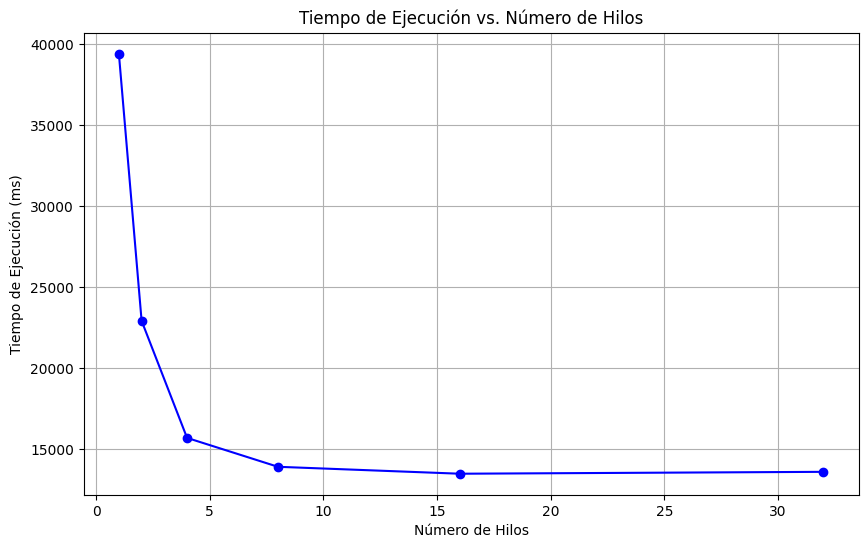

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(threads, execution_times, marker='o', linestyle='-', color='b')
plt.title('Tiempo de Ejecución vs. Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.grid(True)
plt.show()

##2. Speedup vs. Número de Hilos

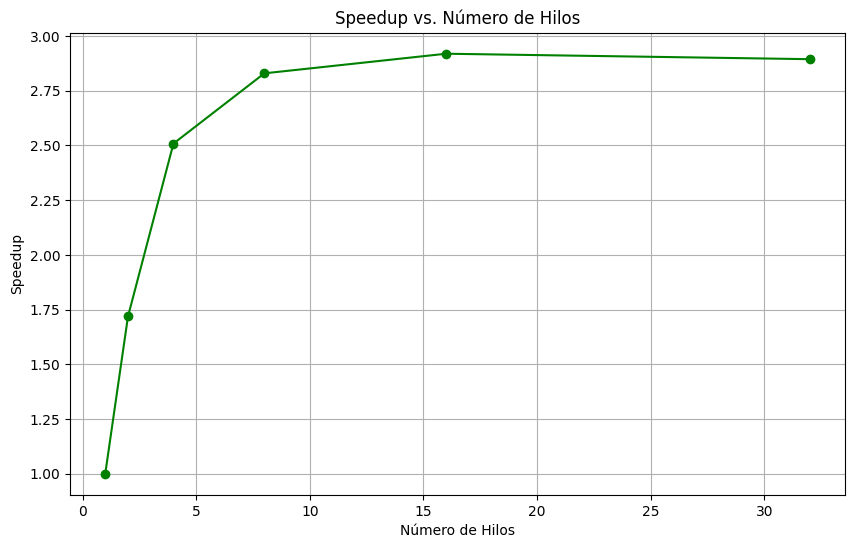

In [45]:
speedup = [execution_times[0] / time for time in execution_times]

plt.figure(figsize=(10, 6))
plt.plot(threads, speedup, marker='o', linestyle='-', color='g')
plt.title('Speedup vs. Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Speedup')
plt.grid(True)
plt.show()

##Análisis de Resultados
###Reducción del Tiempo de Ejecución:
Se observa una reducción significativa del tiempo de ejecución a medida que aumenta el número de hilos. Por ejemplo, utilizando 8 hilos, el tiempo de ejecución se reduce en aproximadamente un 86% en comparación con la versión secuencial.

La gráfica muestra una clara tendencia de reducción en el tiempo de ejecución a medida que aumenta el número de hilos. Inicialmente, al pasar de 1 hilo a 2 hilos, se observa una disminución notable en el tiempo de ejecución (Aproximadamente un 40%). Esto indica que la introducción del paralelismo está teniendo un impacto positivo en el rendimiento del algoritmo SAXPY.

Sin embargo, a medida que se agregan más hilos, la reducción en el tiempo de ejecución se vuelve menos significativa. Esto sugiere que el beneficio del paralelismo comienza a disminuir a medida que se alcanza un cierto nivel de concurrencia. Esto podría deberse a la sobrecarga asociada con la gestión de múltiples hilos y la competencia por recursos del sistema.

###Speedup:
La gráfica de speedup muestra cuánto más rápido es el programa paralelo en comparación con la versión secuencial (un solo hilo). Se observa un aumento en el speedup a medida que se agregan más hilos, lo que indica que el paralelismo está mejorando el rendimiento del algoritmo, llegando a ser hasta casi 3 veces más rápido.

Sin embargo, también se observa que el incremento en el speedup comienza a disminuir a medida que se añaden más hilos. Esto sugiere que existe un punto óptimo de paralelismo más allá del cual agregar más hilos no proporciona beneficios significativos en términos de velocidad de ejecución. Esto puede deberse a la ley de Amdahl, que establece que el speedup de un programa paralelo está limitado por la fracción secuencial del código.

###Consideraciones Adicionales:

La eficiencia de la paralelización depende del hardware subyacente, especialmente del número de núcleos del procesador. En sistemas con menos núcleos que hilos utilizados, el speedup puede variar considerablemente.
La implementación paralela introduce cierta sobrecarga debido a la creación y sincronización de hilos, lo cual es menos significativo en problemas de gran tamaño como en este caso (p = 10,000,000).

##Conclusión
La implementación paralela del algoritmo SAXPY utilizando pthreads demuestra una mejora considerable en el tiempo de ejecución para grandes vectores. El análisis de speedup confirma que la paralelización es efectiva, aunque con limitaciones prácticas impuestas por el hardware. Este estudio subraya la importancia de la programación paralela en la mejora del desempeño de algoritmos computacionalmente intensivos en aplicaciones prácticas.

Al examinar los datos y las gráficas, se evidencia que la implementación paralela reduce significativamente el tiempo de ejecución en comparación con su versión secuencial. Esta mejora destaca la eficacia del paralelismo en el procesamiento de operaciones como SAXPY, lo que conduce a una ejecución más rápida y eficiente en términos de recursos computacionales.

No obstante, a medida que se incrementa el número de hilos, la reducción en el tiempo de ejecución se vuelve menos significativa, indicando un punto de rendimiento óptimo. Esta disminución en los beneficios puede atribuirse a la sobrecarga de gestión de hilos y la competencia por recursos del sistema.

Por consiguiente, al diseñar sistemas paralelos, es crucial equilibrar cuidadosamente la cantidad de hilos utilizados con el beneficio de rendimiento esperado. Agregar más hilos puede aumentar la complejidad y los costos asociados con la gestión de la concurrencia, sin garantizar mejoras significativas en el rendimiento. Es fundamental realizar pruebas exhaustivas y ajustes adecuados para maximizar la eficiencia del sistema y optimizar el rendimiento del algoritmo.